In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt 
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") 
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification

import warnings
warnings.simplefilter(action='ignore')

In [2]:
pwd

'C:\\Users\\Manish'

In [3]:
hr_df = pd.read_csv("C:\\Users\\Manish\\HR_comma_sep.csv")
hr_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
print('The number of samples in data is {}.'.format(hr_df.shape[0]))

The number of samples in data is 14999.


In [5]:
hr_df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [6]:
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
hr_string = hr_df.select_dtypes(exclude=[np.number])
hr_string.head(3)

,Department,salary
0,sales,low
1,sales,medium
2,sales,medium


# TASK - 1

In [8]:
import seaborn as sns

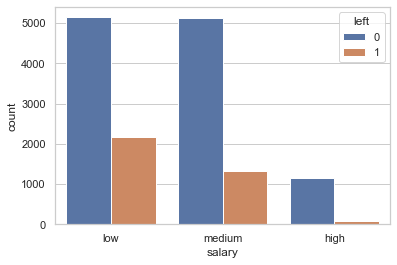

In [9]:
sns.countplot(x="salary",hue='left',data=hr_df)
plt.show()

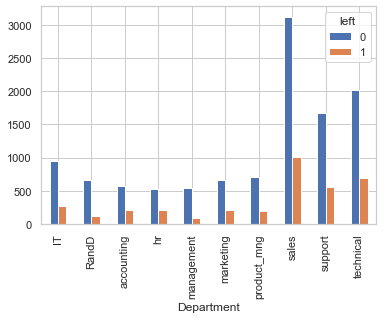

In [10]:
pd.crosstab(hr_df.Department,hr_df.left).plot(kind='bar')
plt.show()

# TASK - 2

In [11]:
hr_df[hr_df.isnull().any(axis=1)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


In [12]:
column_correlation = hr_df.corr()
column_correlation

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


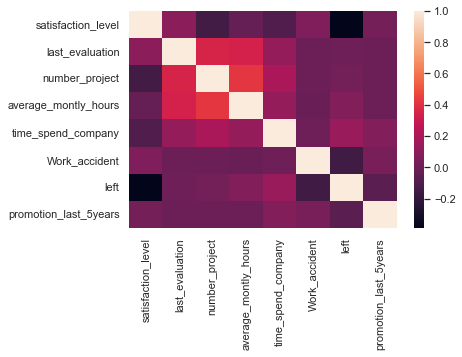

In [13]:
import seaborn as sns

sns.heatmap(column_correlation);
plt.show()

In [16]:
#C

surviver_encoder = preprocessing.LabelEncoder()

surviver_encoder.fit(hr_df.salary)
print(surviver_encoder.classes_)
hr_df.salary = surviver_encoder.transform(hr_df.salary)



[0 1 2]


In [17]:
surviver_encoder = preprocessing.LabelEncoder()

surviver_encoder.fit(hr_df.Department)
print(surviver_encoder.classes_)
hr_df.Department = surviver_encoder.transform(hr_df.Department)



[0 1 2 3 4 5 6 7 8 9]


### TASK - 3

In [18]:
hr_train, hr_test = train_test_split(hr_df,train_size = 0.7)

print('Size of training dataset: ', hr_train.shape)
print('Size of test dataset: ', hr_test.shape)

Size of training dataset:  (10499, 10)
Size of test dataset:  (4500, 10)


In [20]:
X_train = hr_train.drop(columns='left', axis =1)
Y_train = hr_train['left']
X_test = hr_test.drop(columns='left', axis =1)
Y_test = hr_test['left']
X_train.shape, Y_train.shape, X_test.shape                                  

((10499, 9), (10499,), (4500, 9))

In [21]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

76.53

In [24]:
coeff_df = pd.DataFrame(hr_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)



,Feature,Correlation
1,number_project,0.641429
4,Work_accident,0.214700
7,Department,0.038067
3,time_spend_company,0.004413
8,salary,-0.021130
2,average_montly_hours,-0.300042
6,promotion_last_5years,-0.852358
5,left,-1.581703
0,last_evaluation,-4.109917


In [25]:
logreg.intercept_

array([0.11436181])

In [26]:
logreg.score(X_test, Y_test)

0.7684444444444445

In [28]:
Y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

### TASK - 4 

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[3202,  253],
       [ 789,  256]], dtype=int64)

In [31]:
print('accuracy:', accuracy_score(Y_test, Y_pred))
print('recall:', recall_score(Y_test, Y_pred, average='weighted'))
print('f1-score:', f1_score(Y_test, Y_pred, average='weighted'))
print('precision:', precision_score(Y_test, Y_pred))

accuracy: 0.7684444444444445
recall: 0.7684444444444445
f1-score: 0.7368450550239429
precision: 0.5029469548133595


In [32]:
roc = roc_auc_score(Y_test, logreg.predict_proba(X_test)[:,1])
roc

0.7982138084324085

In [37]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

auc = roc_auc_score(Y_test, Y_pred)
print('AUC: %.3f' % auc)

AUC: 0.586


In [38]:
ns_probs = [0 for _ in range(len(Y_test))]

In [39]:
lr_probs = logreg.predict_proba(X_test)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.798


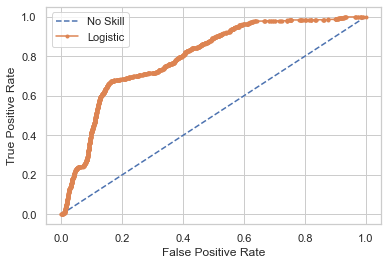

In [40]:
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()